# Assignment 1 - Intro to ML
## 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#print plots inline
%matplotlib inline

#Define names
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 
         'word_freq_3d', 'word_freq_our', 'word_freq_over', 
         'word_freq_remove', 'word_freq_internet', 'word_freq_order',
         'word_freq_mail', 'word_freq_receive', 'word_freq_will',
         'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email',
         'word_freq_you', 'word_freq_credit', 'word_freq_your',
         'word_freq_font', 'word_freq_000', 'word_freq_money',
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
         'word_freq_650', 'word_freq_lab', 'word_freq_labs',
         'word_freq_telnet', 'word_freq_857', 'word_freq_data',
         'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
         'word_freq_original', 'word_freq_project', 'word_freq_re',
         'word_freq_edu', 'word_freq_table', 'word_freq_conference',
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#']
tst=['capital_run_length_average', 'capital_run_length_longest',
     'capital_run_length_total']

#clean up names
names=[s.replace('word_freq_','').replace('char_freq_','') for s in names]

#Load data
freq = pd.read_csv("../data/spambase.data",names=names,usecols=range(54)) # the iris dataset is now a Pandas DataFrame
y = pd.read_csv("../data/spambase.data",usecols=[57],names=['spam']) 

freq.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000


In [2]:
#Get data and standardize
df = pd.read_csv("../data/spambase.data",names=names+tst,usecols=range(57))
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.023029,0.029901,0.070460,-0.001528,0.000778,-0.016310,-0.015709,-0.009477,-0.017123,-0.013169,...,-0.003187,-0.008797,-0.014257,-0.00416,0.015670,-0.012629,-0.002231,-0.001303,0.000884,-0.000334
1,0.023226,0.004691,0.043009,-0.001528,-0.017222,0.031309,0.013176,-0.003177,-0.017123,0.038536,...,-0.003187,-0.008797,-0.000721,-0.00416,0.003169,0.017356,0.000190,-0.000070,0.004889,0.047015
2,-0.009814,-0.014917,0.084185,-0.001528,0.091778,0.016003,0.010425,0.001324,0.104550,0.000582,...,-0.003187,-0.006516,0.000407,-0.00416,0.000213,0.018023,-0.001727,0.004203,0.043335,0.124729
3,-0.023029,-0.014917,-0.055031,-0.001528,0.031778,-0.016310,0.026932,0.047228,0.041812,0.021484,...,-0.003187,-0.008797,-0.000208,-0.00416,-0.004066,-0.012629,-0.002231,-0.001502,-0.001219,-0.005826
4,-0.023029,-0.014917,-0.055031,-0.001528,0.031778,-0.016310,0.026932,0.047228,0.041812,0.021484,...,-0.003187,-0.008797,-0.000413,-0.00416,-0.004128,-0.012629,-0.002231,-0.001502,-0.001219,-0.005826


## Plotting frequencies
Here is a plot of the 50 first mails with the five words: make, address, all, 3d and our. These mails are all classified as spam.

We can allready see here that if more were added it is hard to differentiate just from the plot

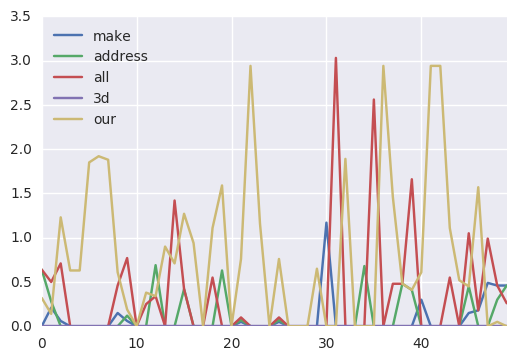

In [3]:
#take the first 50 inputs and take the 5 first words and plot
freq.iloc[:50,range(5)].plot()


## Principal component Analysis (PCA)
To get more out of this data we need to lower the dimentionality.
This is done with sklearns PCA (IncrementalPCA can be used if dataset cannot fit in memory).

We want this lowered to a two-dimensional problem so n_components is set to two.

Then the pca is applied to our input data X.

In [66]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_components = 8

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


### Plotting PCA
A color scheme is set for better visability.

Then we define the axis that we computed $PCA1$ $PCA2$ and then we simply plot the $PCA$.

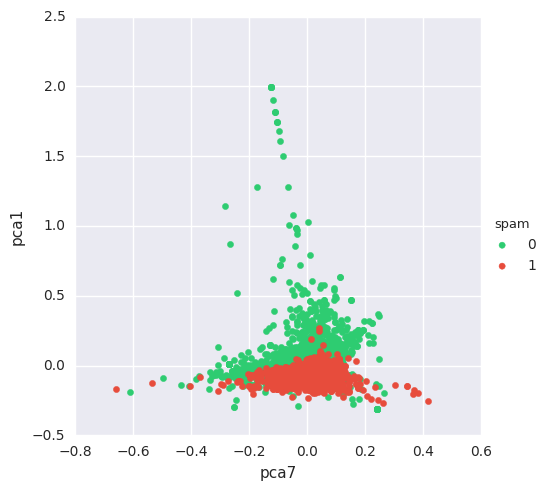

In [81]:
#color scheme
flatui = [ "#2ecc71","#e74c3c"]
sns.set_palette(flatui)

#plot PCA
spam_pca = pd.DataFrame(X_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8'])
spam_pca = pd.concat([spam_pca, y], axis=1)
sns.FacetGrid(spam_pca, hue="spam", size=5) \
   .map(plt.scatter, "pca7", "pca1") \
   .add_legend()

## Making sense of the plots
As can be seen above the pca clearly groups most of the spam together whereas the real emails are more spread out.

To get some more information we separate the spam from the real e-mails and plot their pca with a histogram for both pca1 and pca2.

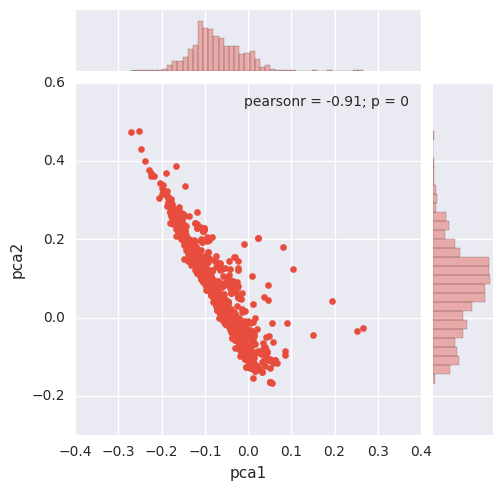

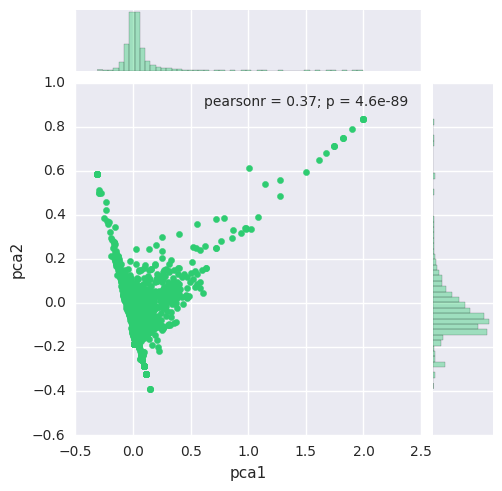

In [33]:
g=np.array(y)
_not= spam_pca[g==0]
_spam= spam_pca[g==1]
sns.jointplot(x="pca1", y="pca2",data=_spam, size=5 , color =flatui[1])

sns.jointplot(x="pca1", y="pca2",data=_not, size=5, color =flatui[0])


Rofolol

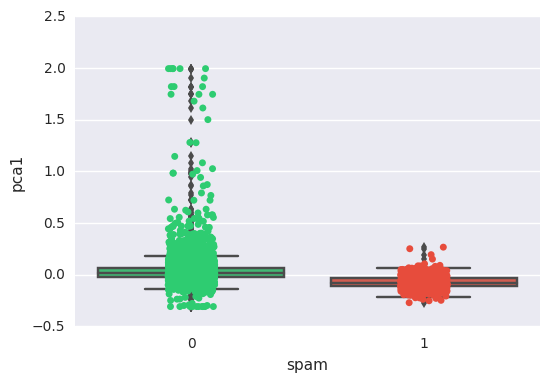

In [45]:
ax = sns.boxplot(x="spam", y="pca1", data=spam_pca)
ax = sns.stripplot(x="spam", y="pca1", data=spam_pca, jitter=True, edgecolor="gray")

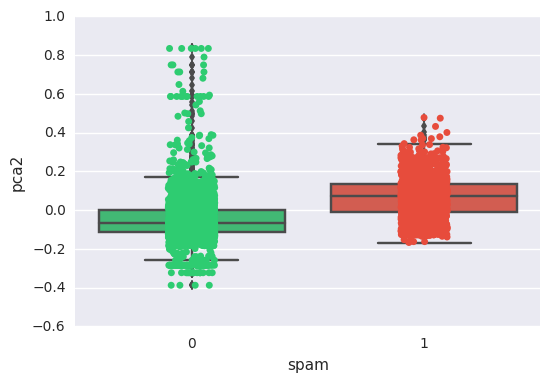

In [46]:
ax = sns.boxplot(x="spam", y="pca2", data=spam_pca)
ax = sns.stripplot(x="spam", y="pca2", data=spam_pca, jitter=True, edgecolor="gray")

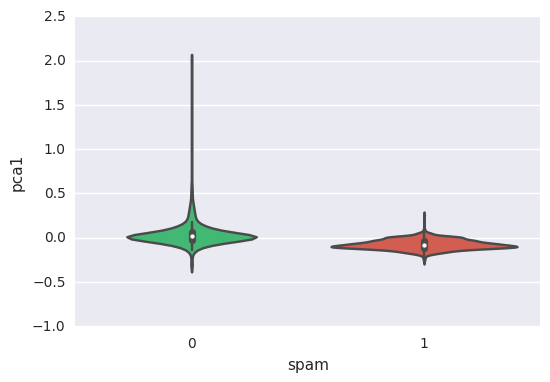

In [47]:
sns.violinplot(x="spam", y="pca1", data=spam_pca, size=6)

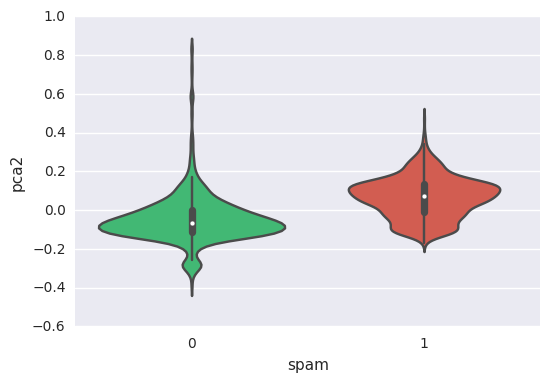

In [48]:
sns.violinplot(x="spam", y="pca2", data=spam_pca, size=6)

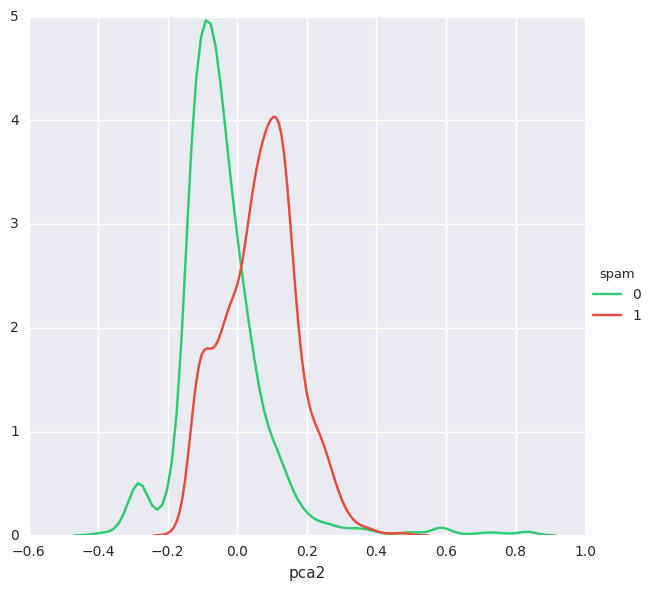

In [49]:
sns.FacetGrid(spam_pca, hue="spam", size=6) \
   .map(sns.kdeplot, "pca2") \
   .add_legend()

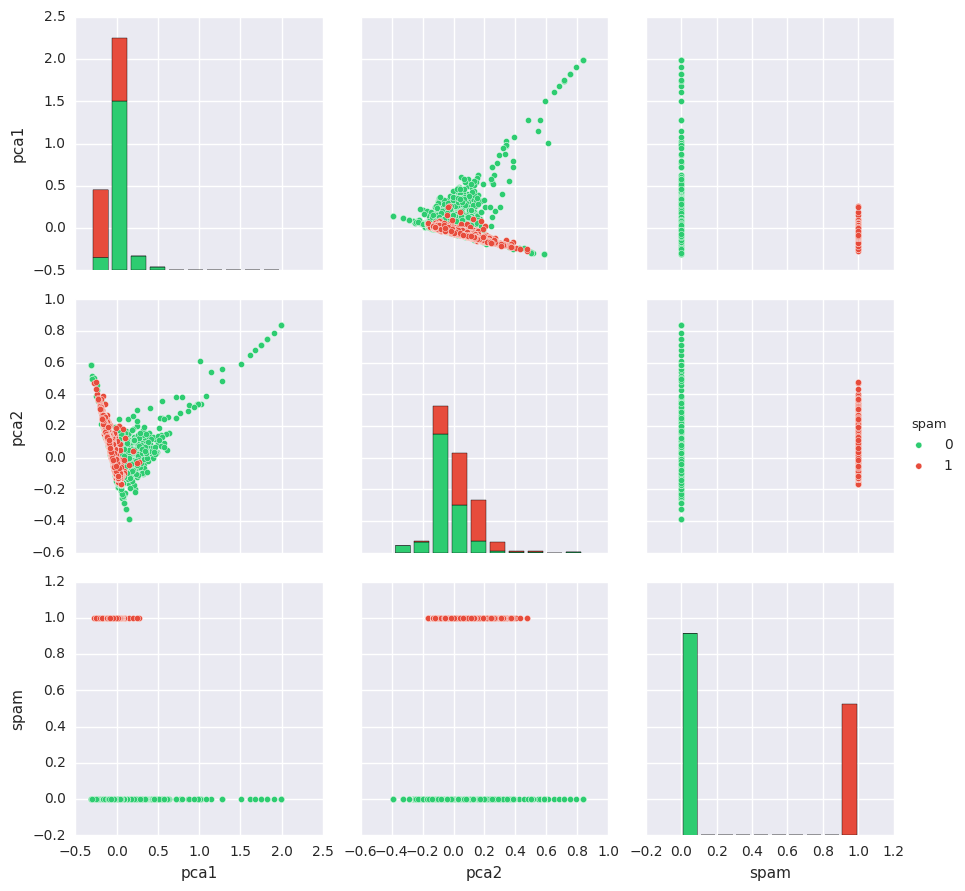

In [50]:
sns.pairplot(spam_pca, hue="spam", size=3)

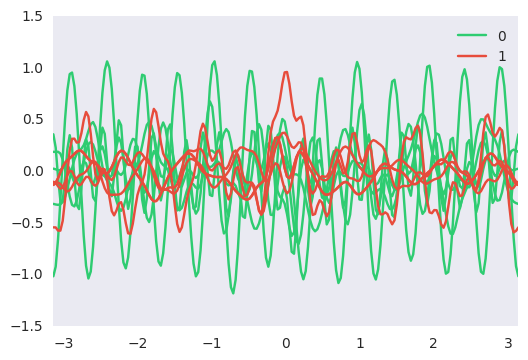

In [55]:
from pandas.tools.plotting import andrews_curves
X2 = pd.concat([X, y], axis=1)
X20=X2[g==0]
X21=X2[g==1]
X2 = pd.concat([X20[:5],X21[:5]])
andrews_curves(X2, "spam", color=flatui)


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,spam
0,-0.054758,0.018298,-0.032451,0.049602,-0.050006,-0.004534,-0.025657,0.033009,1
1,-0.107303,0.116658,0.011768,0.009410,-0.007254,0.018418,-0.035187,-0.044513,1
2,-0.094333,0.110043,-0.032308,0.120548,-0.069799,-0.028378,0.108129,-0.329888,1
3,-0.050025,-0.000727,0.012626,-0.057640,0.024009,0.057162,-0.041830,-0.057584,1
4,-0.050035,-0.000731,0.012630,-0.057642,0.024009,0.057160,-0.041834,-0.057581,1
5,0.005928,-0.103329,-0.020593,-0.028708,-0.004210,0.015152,0.052394,-0.041649,1
6,-0.100121,0.106127,0.031837,-0.097990,0.084845,-0.050965,-0.069570,-0.102058,1
7,0.005607,-0.102964,-0.020533,-0.028795,-0.004156,0.015036,0.052472,-0.042027,1
8,-0.106144,0.144499,0.043419,-0.034208,0.018974,-0.111945,0.108187,-0.049475,1
9,-0.055453,0.013773,-0.044949,0.085809,-0.023657,0.005677,-0.005568,-0.011434,1


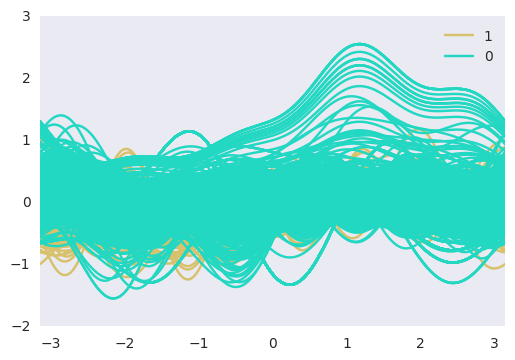

In [80]:
X2 = pd.concat([X20,X21])
andrews_curves(spam_pca, "spam")
spam_pca

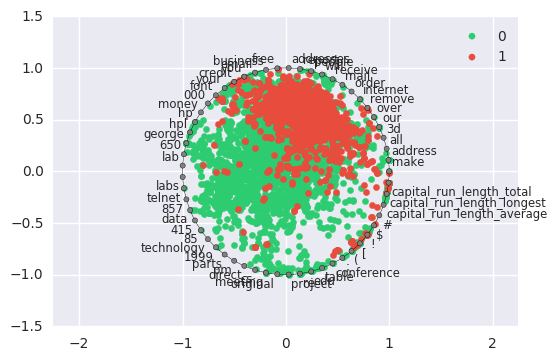

In [58]:
from pandas.tools.plotting import radviz
radviz(X2, "spam", color=flatui)